In [1]:
import wikipedia as wp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.express as px
from datetime import datetime
import missingno as msno
import seaborn as sns
import plotly.graph_objects as go
from mplfinance.original_flavor import candlestick_ohlc 
%matplotlib inline


In [2]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

# show financials
msft.financials
msft.quarterly_financials

# show major holders
msft.major_holders

# show institutional holders
msft.institutional_holders

# show balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet

# show cashflow
msft.cashflow
msft.quarterly_cashflow

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations

# show next event (earnings, etc)
msft.calendar

# show all earnings dates
msft.earnings_dates

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# show news
msft.news

# get option chain for specific expiration
opt = msft.option_chain('2024-06-21')
# data available via: opt.calls, opt.puts

In [ ]:
html=wp.page('list of S&P 500 companies').html().encode('utf-8')
df500=pd.read_html(html)[0]
datSymbol=  df500.Symbol.str.replace(".","-").to_list()
df = yf.download(datSymbol, group_by='Ticker', start="2000-01-01", end="2021-12-31")
df1=df.stack(level=0).rename_axis(['Date','Ticker']).reset_index(level=1)
df1.reset_index(inplace=True)
df1.sort_values(by=['Ticker','Date'],ascending=True, inplace=True)
df1['Status'] = np.where(df1['Ticker']!=df1['Ticker'].shift(1), 1,0)#inicaliza en cero los valores de las empresas en df1
df1.reset_index(inplace=True,drop=True)

## 1. ¿Cuál es el mejor día para invertir teniendo en cuenta el retorno de los movimiento gaps?

In [11]:
df1['Date']=pd.to_datetime(df1['Date'])
df1['Day']= df1['Date'].dt.day_name()
df1['Retornos_gaps']= np.where(df1['Status'].values ==1,0, np.log(df1['Open']/df1['Close'].shift(1)).fillna(0))
df1['Retornos_Intra']=np.log(df1['Close']/df1['Open']).fillna(0)
df1['Variaciones']= np.where(df1['Status'].values ==1,0, df1['Adj Close'].pct_change())
df1['Volatilidad']=df1['Variaciones'].rolling(250).std()*100*(250)**0.5 
df2=df1.groupby (['Day']). agg ({'Retornos_gaps': ['median','max','mean','min','std']}). reset_index ()

In [14]:
df2

Day Retornos_gaps                                        
                    median       max      mean       min       std
0     Friday      0.000240  0.440770  0.000222 -0.640803  0.012793
1     Monday      0.000000  0.484487  0.000041 -1.161067  0.013623
2   Thursday      0.000000  0.510056  0.000057 -0.604080  0.012510
3    Tuesday      0.000164  0.386317  0.000578 -1.797111  0.012413
4  Wednesday      0.000000  0.336472  0.000116 -0.734991  0.012119

In [15]:
dic1=dict(df2)
dic1.keys()

dict_keys([('Day', ''), ('Retornos_gaps', 'median'), ('Retornos_gaps', 'max'), ('Retornos_gaps', 'mean'), ('Retornos_gaps', 'min'), ('Retornos_gaps', 'std')])

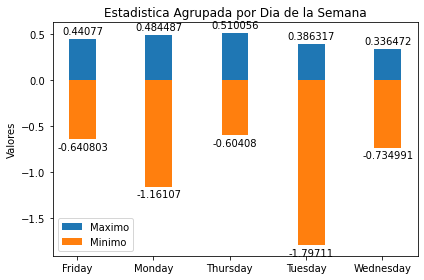

In [17]:
import matplotlib.pyplot as plt
import numpy as np


labels = dic1[ ('Day', '')]
Maximo = dic1[('Retornos_gaps', 'max')]
Minimo= dic1[('Retornos_gaps', 'min')]



x = np.arange(len(labels))  
width = 0.35 

fig, ax = plt.subplots()
rects2 = ax.bar(x + width/5, Maximo, width, label='Maximo')
rects4 = ax.bar(x + width/5, Minimo, width, label='Minimo')


ax.set_ylabel('Valores')
ax.set_title('Estadistica Agrupada por Dia de la Semana')
ax.set_xticks(x, labels)
ax.legend()


ax.bar_label(rects2, padding=3)

ax.bar_label(rects4, padding=3)

fig.tight_layout()

plt.show()

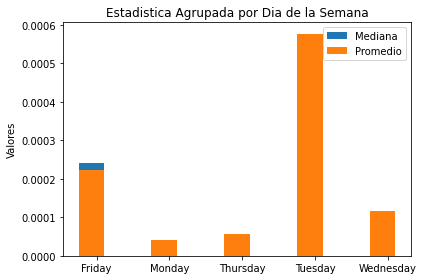

In [18]:
import matplotlib.pyplot as plt
import numpy as np


labels = dic1[ ('Day', '')]
Mediana = dic1[('Retornos_gaps', 'median')]
Maximo = dic1[('Retornos_gaps', 'max')]
Promedio= dic1[('Retornos_gaps', 'mean')]
Minimo= dic1[('Retornos_gaps', 'min')]
Desviacion=dic1[('Retornos_gaps', 'std')]


x = np.arange(len(labels))  
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/5, Mediana, width, label='Mediana')
rects3 = ax.bar(x - width/5, Promedio, width, label='Promedio')

ax.set_ylabel('Valores')
ax.set_title('Estadistica Agrupada por Dia de la Semana')
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()

plt.show()

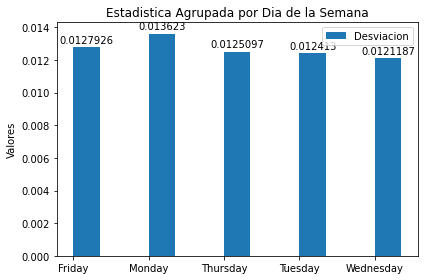

In [19]:
import matplotlib.pyplot as plt
import numpy as np


labels = dic1[ ('Day', '')]
Mediana = dic1[('Retornos_gaps', 'median')]
Maximo = dic1[('Retornos_gaps', 'max')]
Promedio= dic1[('Retornos_gaps', 'mean')]
Minimo= dic1[('Retornos_gaps', 'min')]
Desviacion=dic1[('Retornos_gaps', 'std')]


x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()
rects5 = ax.bar(x + width/2,Desviacion, width, label='Desviacion')


ax.set_ylabel('Valores')
ax.set_title('Estadistica Agrupada por Dia de la Semana')
ax.set_xticks(x, labels)
ax.legend()


ax.bar_label(rects5, padding=2)


fig.tight_layout()

plt.show()

In [20]:
df4=df1[df1.Retornos_gaps>-200]
from statistics import mode, multimode
Dia1=mode(df4['Day'])
Dia1

'Wednesday'


De acuerdo a los datos el mejor dia para comprar seria el jueves porque tiene un valor mínimo y máximo de retorno gaps más estables. Tambien cuenta con	la desviación standar mas baja que los demás días en estudio.																	

## 2. ¿Cuál es el mejor día para invertir teniendo en cuenta el retorno de los movimientos intradiarios?

In [21]:
df3=df1.groupby (['Day']). agg ({'Retornos_Intra': ['median','max','mean','min','std']}). reset_index ()

In [22]:
df3

Day Retornos_Intra                                        
                     median       max      mean       min       std
0     Friday       0.000185  0.450322  0.000250 -0.576887  0.019329
1     Monday       0.000000  0.395102 -0.000307 -0.614557  0.020404
2   Thursday       0.000656  0.424211  0.000520 -0.612541  0.021020
3    Tuesday       0.000225  0.706570  0.000187 -0.524181  0.020404
4  Wednesday       0.000222  0.530853  0.000239 -0.490651  0.020722

In [23]:
dic=dict(df3)


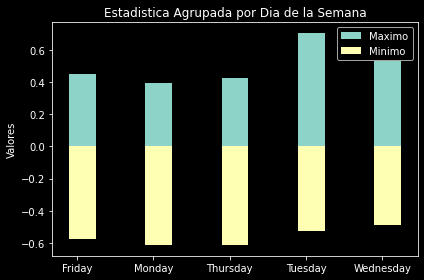

In [259]:
import matplotlib.pyplot as plt
import numpy as np


labels = dic[ ('Day', '')]

Maximo = dic[('Retornos_Intra', 'max')]
Minimo= dic[('Retornos_Intra', 'min')]
x = np.arange(len(labels))  
width = 0.35 

fig, ax = plt.subplots()

rects2 = ax.bar(x + width/5, Maximo, width, label='Maximo')
rects4 = ax.bar(x + width/5, Minimo, width, label='Minimo')


ax.set_ylabel('Valores')
ax.set_title('Estadistica Agrupada por Dia de la Semana')
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()

plt.show()

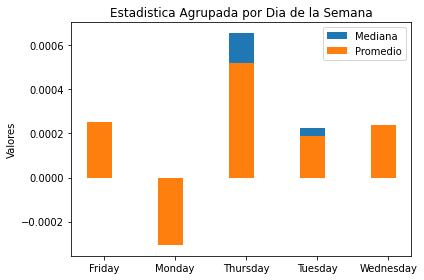

In [24]:
import matplotlib.pyplot as plt
import numpy as np


labels = dic[ ('Day', '')]
Mediana = dic[('Retornos_Intra', 'median')]
Promedio= dic[('Retornos_Intra', 'mean')]

x = np.arange(len(labels))  
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/5, Mediana, width, label='Mediana')
rects3 = ax.bar(x - width/5, Promedio, width, label='Promedio')

ax.set_ylabel('Valores')
ax.set_title('Estadistica Agrupada por Dia de la Semana')
ax.set_xticks(x, labels)
ax.legend()


fig.tight_layout()

plt.show()

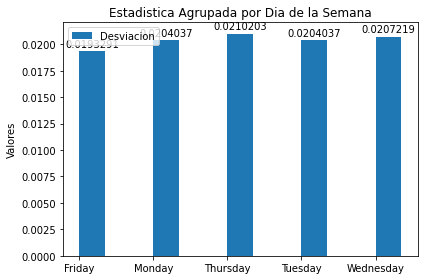

In [25]:
import matplotlib.pyplot as plt
import numpy as np


labels = dic[ ('Day', '')]
Desviacion=dic[('Retornos_Intra', 'std')]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects5 = ax.bar(x + width/2,Desviacion, width, label='Desviacion')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Valores')
ax.set_title('Estadistica Agrupada por Dia de la Semana')
ax.set_xticks(x, labels)
ax.legend()


ax.bar_label(rects5, padding=2)


fig.tight_layout()

plt.show()

In [26]:
df5=df1[df1.Retornos_Intra>-200]
from statistics import mode, multimode
Dia2=mode(df5['Day'])
Dia2

'Wednesday'


								
Basandome en los datos el mejor día para comprar según lo observado en los movimientos intradiarios seria el viernes,   Cuenta con el valor mínimo y maximos proporcionados, la media y promedio es reducida. Cuenta también con una desviación standar mas baja que los demas días.								
								

## 3. ¿Cuáles son las mejores industrias que pertenecen al SP500 en las cuales se puede invertir?

In [16]:
datawiki=df500.loc[:,['Symbol','GICS Sector','GICS Sub-Industry','CIK']]


In [17]:
datawiki=datawiki.rename({'Symbol': 'Ticker'}, axis=1)
datawiki.Ticker.str.replace(".", "-")
dfIndustria=pd.merge(datawiki,df1, on='Ticker', how='inner')

C:\Users\karen\AppData\Local\Temp\ipykernel_10732\122502288.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  datawiki.Ticker.str.replace(".", "-")


In [18]:
df6=dfIndustria.groupby (['GICS Sector']). agg ({'Volume': ['max']}). reset_index ()
df6.sort_values(('Volume', 'max'),ascending=False, inplace=True)

In [19]:
df7=dfIndustria.groupby (['GICS Sector']). agg ({'Adj Close': ['median']}). reset_index ()
df7.sort_values(('Adj Close', 'median'),ascending=False, inplace=True)

In [20]:
df8=dfIndustria.groupby (['GICS Sector']). agg ({'Variaciones': ['mean']}). reset_index ()
df8.sort_values(('Variaciones', 'mean'),ascending=False, inplace=True)

In [21]:
df9=dfIndustria.groupby (['GICS Sector']). agg ({'Volatilidad': ['median']}). reset_index ()
df9.sort_values(('Volatilidad', 'median'),ascending=False, inplace=True)

In [22]:
df10=pd.merge(df6,df7, on='GICS Sector', how='inner')#,df8,df9 dfestIndustria

C:\Users\karen\AppData\Local\Temp\ipykernel_10732\1755110695.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df10=pd.merge(df6,df7, on='GICS Sector', how='inner')#,df8,df9 dfestIndustria


In [23]:
df11=pd.merge(df10,df8, on='GICS Sector', how='inner')#,df8,df9 dfestIndustria

C:\Users\karen\AppData\Local\Temp\ipykernel_10732\1495803759.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df11=pd.merge(df10,df8, on='GICS Sector', how='inner')#,df8,df9 dfestIndustria


In [24]:
dfestIndustria=pd.merge(df11,df9, on='GICS Sector', how='inner')#,df8,df9 dfestIndustria

C:\Users\karen\AppData\Local\Temp\ipykernel_10732\828076678.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  dfestIndustria=pd.merge(df11,df9, on='GICS Sector', how='inner')#,df8,df9 dfestIndustria


In [25]:

dfestIndustria.sort_values(('Volume', 'max'),ascending=False, inplace=True)
df12=dfestIndustria.head(9)
df12['Capitlizacion_Bursatil']=df12[('Volume', 'max')]/df12[('Adj Close', 'median')]
df12

C:\Users\karen\AppData\Local\Temp\ipykernel_10732\3762382217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['Capitlizacion_Bursatil']=df12[('Volume', 'max')]/df12[('Adj Close', 'median')]


,GICS Sector,Volume,Adj Close,Variaciones,Volatilidad,Capitlizacion_Bursatil
,,max,median,mean,median,
0,Information Technology,7.421641e+09,26.783421,0.000888,33.623149,2.770983e+08
1,Communication Services,2.720061e+09,24.020045,0.000688,30.726358,1.132413e+08
2,Consumer Discretionary,2.086584e+09,32.474876,0.000880,31.583230,6.425225e+07
3,Financials,1.226791e+09,34.446201,0.000679,26.151833,3.561471e+07
4,Industrials,4.286171e+08,36.847996,0.000744,27.686357,1.163203e+07
5,Materials,3.582800e+08,34.589039,0.000688,28.948476,1.035819e+07
6,Health Care,3.053816e+08,40.887447,0.000822,28.392025,7.468836e+06
7,Energy,2.739966e+08,30.323092,0.000678,31.933375,9.035906e+06
8,Consumer Staples,2.709882e+08,31.155378,0.000543,21.300056,8.697959e+06


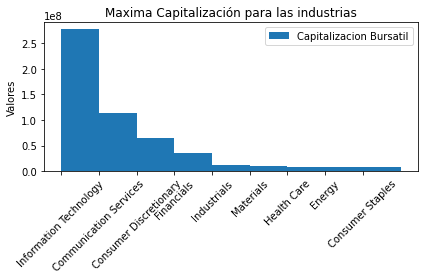

In [26]:
labels = df12[('GICS Sector', '')]
Volumen= df12[('Capitlizacion_Bursatil', '')]


x = np.arange(len(labels))  
width =1.0  

fig, ax = plt.subplots()

rects5 = ax.bar(x + width/2,Volumen, width, label='Capitalizacion Bursatil')

ax.set_ylabel('Valores')
ax.set_title('Maxima Capitalización para las industrias')
ax.set_xticks(x, labels, rotation=45 )
ax.legend()

fig.tight_layout()

plt.show() 

## 3. ¿Cuales fueron los momentos de alta volatilidad que afectaron al SP500?

In [27]:
df1['Date']=pd.to_datetime(df1['Date'])
df1['Anual']= df1['Date'].dt.year

In [28]:
df13=df1

In [29]:
df14=df13.groupby (['Anual']). agg ({'Volatilidad': ['max']}). reset_index ()
df14.sort_values(('Volatilidad', 'max'),ascending=False, inplace=True)

In [30]:
df14.sort_values(('Anual', ''), inplace=True)

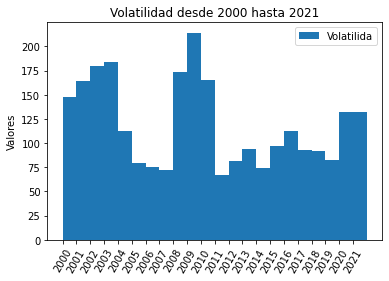

In [31]:
import matplotlib.pyplot as plt
import numpy as np


labels = df14[ ('Anual', '')]
Desviacion=df14[(('Volatilidad', 'max'))]


x = np.arange(len(labels)) 
width =1.0  

fig, ax = plt.subplots()

rects5 = ax.bar(x + width/2,Desviacion, width, label='Volatilida')

ax.set_ylabel('Valores')
ax.set_title('Volatilidad desde 2000 hasta 2021')
ax.set_xticks(x, labels,rotation=60)
ax.legend()

plt.show()

In [32]:
listadoanion=df13.groupby(['Anual']).agg({'Volatilidad': ['max']}).sort_values(by='Anual' )

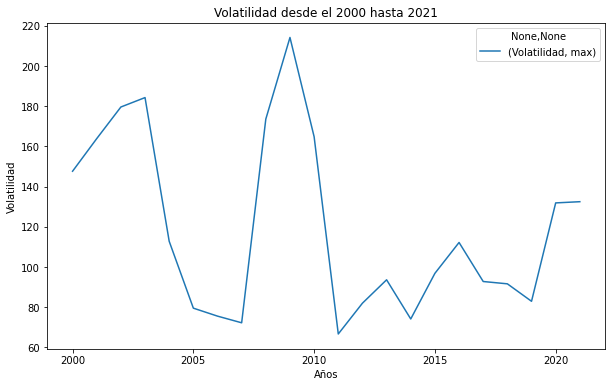

In [33]:

listadoanion.plot(kind='line',figsize=(10,6));
plt.title("Volatilidad desde el 2000 hasta 2021");
plt.xlabel('Años');
plt.ylabel('Volatilidad');


En 2003 la volatilidad se debe a la amenaza de invasion a irak.
En el año  2009 se dio la caida mas grande debido a la crisis inmoviliario que venia gestionandose ya años antes.
En el 2020 cae a raiz de la caida de los precios del petrolio, gerra de precios iniciada por Arabia Saudita.
En el mismo 2020 a inicios se ve afectada por la pandemia de Coronavirus.

5. ¿Cuáles son las 9 mejores empresas para invertir?

In [37]:
df15=df1.groupby (['Ticker']). agg({'Volume': ['max']}). reset_index ()
df15.sort_values(('Volume', 'max'),ascending=False, inplace=True)


In [38]:
df16=df1.groupby (['Ticker']). agg ({'Adj Close': ['median']}). reset_index ()
df16.sort_values(('Adj Close', 'median'),ascending=False, inplace=True)

In [39]:

df17=df1.groupby (['Ticker']). agg ({'Variaciones': ['mean']}). reset_index ()
df17.sort_values(('Variaciones', 'mean'),ascending=False, inplace=True)

In [40]:
df18=df1.groupby (['Ticker']). agg ({'Volatilidad': ['median']}). reset_index ()
df18.sort_values(('Volatilidad', 'median'),ascending=False, inplace=True)

In [41]:
df19=pd.merge(df15,df16, on=['Ticker'], how='inner')#dfestEmpresa

C:\Users\karen\AppData\Local\Temp\ipykernel_10732\1653830126.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df19=pd.merge(df15,df16, on=['Ticker'], how='inner')#dfestEmpresa


In [42]:
df20=pd.merge(df19,df17, on=['Ticker'], how='inner')#dfestEmpresa

C:\Users\karen\AppData\Local\Temp\ipykernel_10732\2991114126.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df20=pd.merge(df19,df17, on=['Ticker'], how='inner')#dfestEmpresa


In [43]:
df21=pd.merge(df20,df18, on=['Ticker'], how='inner')#dfestEmpresa

C:\Users\karen\AppData\Local\Temp\ipykernel_10732\3148766881.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df21=pd.merge(df20,df18, on=['Ticker'], how='inner')#dfestEmpresa


In [44]:
df21.sort_values(('Volume', 'max'),ascending=False, inplace=True)
df22=df21.head(9)
df22

,Ticker,Volume,Adj Close,Variaciones,Volatilidad
,,max,median,mean,median
0,AAPL,7.421641e+09,9.929199,0.001297,33.335290
1,MTCH,2.720061e+09,8.788105,0.000878,36.957124
2,AMZN,2.086584e+09,8.685500,0.001157,37.404844
3,BAC,1.226791e+09,20.929085,0.000621,29.635704
4,NVDA,9.230856e+08,3.824552,0.001757,49.337648
5,V,7.084860e+08,62.556841,0.000995,23.809338
6,VZ,6.166205e+08,21.140913,0.000287,17.680368
7,MSFT,5.910522e+08,22.592459,0.000587,24.536021
8,META,5.735764e+08,135.000000,0.001172,33.348486


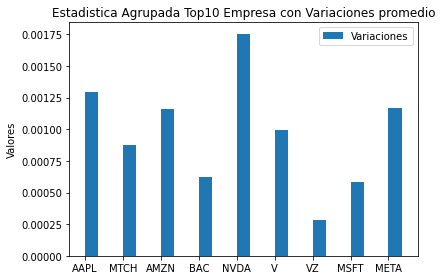

In [45]:
import matplotlib.pyplot as plt
import numpy as np


labels = df22[ ('Ticker', '')]
Desviacion=df22[('Variaciones', 'mean')]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects5 = ax.bar(x + width/2,Desviacion, width, label='Variaciones')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Valores')
ax.set_title('Estadistica Agrupada Top10 Empresa con Variaciones promedio')
ax.set_xticks(x, labels)
ax.legend()


#ax.bar_label(rects5, padding=2)


fig.tight_layout()

plt.show()

##NVIDIA Corporation

In [46]:
import yfinance as yf
import finplot as fplt

df = yf.download('NVDA',start='2011-01-01', end = '2021-12-31')
fplt.candlestick_ochl(df[['Open','Close','High','Low']])
fplt.plot(df.Close.rolling(50).mean())
fplt.plot(df.Close.rolling(200).mean())
fplt.show()

[*********************100%***********************]  1 of 1 completed


In [47]:
msft = yf.Ticker('NVDA')
dicc=msft.info
dicc['industry']

'Semiconductors'

In [48]:
dicc['longBusinessSummary']

"NVIDIA Corporation provides graphics, and compute and networking solutions in the United States, Taiwan, China, and internationally. The company's Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building 3D designs and virtual worlds. Its Compute & Networking segment provides Data Center platforms and systems for AI, HPC, and accelerated computing; Mellanox networking and interconnect solutions; automotive AI Cockpit, autonomous driving development agreements, and autonomous vehicle solutions; cryptocurrency mining processors; Jetson for robotics and other embedded platforms; and NVIDIA AI Enterprise and other software. The company's products are used in gaming, professional visualiza

In [49]:
dicc['trailingPegRatio']#METRICA QUE MIDE PORCENTAJE DE GANANCIA EN UN AÑO

2.2523

### Apple Inc.

In [50]:
import yfinance as yf
import finplot as fplt

df = yf.download('AAPL',start='2011-01-01', end = '2021-12-31')
fplt.candlestick_ochl(df[['Open','Close','High','Low']])
fplt.plot(df.Close.rolling(50).mean())
fplt.plot(df.Close.rolling(200).mean())
fplt.show()

[*********************100%***********************]  1 of 1 completed


In [51]:
msft = yf.Ticker('AAPL')
dicc=msft.info
dicc['industry']

'Consumer Electronics'

In [52]:
dicc['longBusinessSummary']

'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, wh

In [53]:
dicc['trailingPegRatio']#METRICA QUE MIDE PORCENTAJE DE GANANCIA EN UN AÑO

2.4623

### Visa Inc.

In [54]:
import yfinance as yf
import finplot as fplt

df = yf.download('V',start='2011-01-01', end = '2021-12-31')
fplt.candlestick_ochl(df[['Open','Close','High','Low']])
fplt.plot(df.Close.rolling(50).mean())
fplt.plot(df.Close.rolling(200).mean())
fplt.show()

[*********************100%***********************]  1 of 1 completed


In [55]:
msft = yf.Ticker('V')
dicc=msft.info
dicc['industry']

'Credit Services'

In [56]:
dicc['longBusinessSummary']

'Visa Inc. operates as a payments technology company worldwide. The company facilitates digital payments among consumers, merchants, financial institutions, businesses, strategic partners, and government entities. It operates VisaNet, a transaction processing network that enables authorization, clearing, and settlement of payment transactions. In addition, the company offers card products, platforms, and value-added services. It provides its services under the Visa, Visa Electron, Interlink, VPAY, and PLUS brands. Visa Inc. has a strategic agreement with Ooredoo to provide an enhanced payment experience for Visa cardholders and Ooredoo customers in Qatar. Visa Inc. was founded in 1958 and is headquartered in San Francisco, California.'

In [57]:
dicc['trailingPegRatio']#METRICA QUE MIDE PORCENTAJE DE GANANCIA EN UN AÑO

1.3742

### Bank of America Corporation

In [58]:
import yfinance as yf
import finplot as fplt

df = yf.download('BAC',start='2011-01-01', end = '2021-12-31')
fplt.candlestick_ochl(df[['Open','Close','High','Low']])
fplt.plot(df.Close.rolling(50).mean())
fplt.plot(df.Close.rolling(200).mean())
fplt.show()

[*********************100%***********************]  1 of 1 completed


In [59]:
msft = yf.Ticker('BAC')
dicc=msft.info
dicc['industry']

'Banks—Diversified'

In [60]:
dicc['longBusinessSummary']

"Bank of America Corporation, through its subsidiaries, provides banking and financial products and services for individual consumers, small and middle-market businesses, institutional investors, large corporations, and governments worldwide. Its Consumer Banking segment offers traditional and money market savings accounts, certificates of deposit and IRAs, noninterest-and interest-bearing checking accounts, and investment accounts and products; and credit and debit cards, residential mortgages, and home equity loans, as well as direct and indirect loans, such as automotive, recreational vehicle, and consumer personal loans. The company's Global Wealth & Investment Management segment offers investment management, brokerage, banking, and trust and retirement products and services; and wealth management solutions, as well as customized solutions, including specialty asset management services. Its Global Banking segment provides lending products and services, including commercial loans, l

In [61]:
dicc['trailingPegRatio']#METRICA QUE MIDE PORCENTAJE DE GANANCIA EN UN AÑO

3.7704

### Amazon.com, Inc.

In [62]:
import yfinance as yf
import finplot as fplt

df = yf.download('AMZN',start='2011-01-01', end = '2021-12-31')
fplt.candlestick_ochl(df[['Open','Close','High','Low']])
fplt.plot(df.Close.rolling(50).mean())
fplt.plot(df.Close.rolling(200).mean())
fplt.show()

[*********************100%***********************]  1 of 1 completed


In [63]:
msft = yf.Ticker('AMZN')
dicc=msft.info
dicc['industry']

'Internet Retail'

In [64]:
dicc['longBusinessSummary']

'Amazon.com, Inc. engages in the retail sale of consumer products and subscriptions in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It sells merchandise and content purchased for resale from third-party sellers through physical and online stores. The company also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Rings, and Echo and other devices; provides Kindle Direct Publishing, an online service that allows independent authors and publishers to make their books available in the Kindle Store; and develops and produces media content. In addition, it offers programs that enable sellers to sell their products on its websites, as well as its stores; and programs that allow authors, musicians, filmmakers, Twitch streamers, skill and app developers, and others to publish and sell content. Further, the company provides compute, storage, database, analytics, mach

In [124]:
dicc['trailingPegRatio']#METRICA QUE MIDE PORCENTAJE DE GANANCIA EN UN AÑO

4.2705

### Verizon Communications Inc.

In [65]:
import yfinance as yf
import finplot as fplt

df = yf.download('VZ',start='2011-01-01', end = '2021-12-31')
fplt.candlestick_ochl(df[['Open','Close','High','Low']])
fplt.plot(df.Close.rolling(50).mean())
fplt.plot(df.Close.rolling(200).mean())
fplt.show()

[*********************100%***********************]  1 of 1 completed


In [125]:
msft = yf.Ticker('VZ')
dicc=msft.info
dicc['industry']

'Telecom Services'

In [126]:
dicc['longBusinessSummary']

"Verizon Communications Inc., through its subsidiaries, offers communications, technology, information, and entertainment products and services to consumers, businesses, and governmental entities worldwide. Its Consumer segment provides postpaid and prepaid service plans; internet access on notebook computers and tablets; wireless equipment, including smartphones and other handsets; and wireless-enabled internet devices, such as tablets, and other wireless-enabled connected devices comprising smart watches. It also provides residential fixed connectivity solutions, such as internet, video, and voice services; and sells network access to mobile virtual network operators. As of December 31, 2021, it had approximately 115 million wireless retail connections, 7 million wireline broadband connections, and 4 million Fios video connections. The company's Business segment provides network connectivity products, including private networking, private cloud connectivity, virtual and software defi

In [127]:
dicc['trailingPegRatio']#METRICA QUE MIDE PORCENTAJE DE GANANCIA EN UN AÑO

4.701

### Microsoft Corporation develops

In [66]:
import yfinance as yf
import finplot as fplt

df = yf.download('MSFT',start='2011-01-01', end = '2021-12-31')
fplt.candlestick_ochl(df[['Open','Close','High','Low']])
fplt.plot(df.Close.rolling(50).mean())
fplt.plot(df.Close.rolling(200).mean())
fplt.show()

[*********************100%***********************]  1 of 1 completed


In [67]:
msft = yf.Ticker('MSFT')
dicc=msft.info
dicc['industry']

'Software—Infrastructure'

In [134]:
dicc['longBusinessSummary']

'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certification on Microsoft products. Its More Personal Computing segment provides Windows original equipment m

In [135]:
dicc['trailingPegRatio']#METRICA QUE MIDE PORCENTAJE DE GANANCIA EN UN AÑO

1.7858

### Meta Platforms, Inc.

In [68]:
import yfinance as yf
import finplot as fplt

df = yf.download('META',start='2011-01-01', end = '2021-12-31')
fplt.candlestick_ochl(df[['Open','Close','High','Low']])
fplt.plot(df.Close.rolling(50).mean())
fplt.plot(df.Close.rolling(200).mean())
fplt.show()

[*********************100%***********************]  1 of 1 completed


In [2]:
msft = yf.Ticker('META')
dicc=msft.info
dicc['industry']

In [130]:
dicc['longBusinessSummary']

"Meta Platforms, Inc. develops products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, wearables, and in-home devices worldwide. It operates in two segments, Family of Apps and Reality Labs. The Family of Apps segment's products include Facebook, which enables people to share, discover, and connect with interests; Instagram, a community for sharing photos, videos, and private messages, as well as feed, stories, reels, video, live, and shops; Messenger, a messaging application for people to connect with friends, family, groups, and businesses across platforms and devices through chat, audio and video calls, and rooms; and WhatsApp, a messaging application that is used by people and businesses to communicate and transact privately. The Reality Labs segment provides augmented and virtual reality related products comprising virtual reality hardware, software, and content that help people feel connected, 

In [131]:
dicc['trailingPegRatio']#METRICA QUE MIDE PORCENTAJE DE GANANCIA EN UN AÑO

1.0399